# Project: Investigate a Dataset - [No Show Appointment]

Table of Contents
    Introduction
    Data Wrangling
    Exploratory Data Analysis
    Conclusions

In [233]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



In [234]:
#read file of no show appointment
apps=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
#display 2 rows 
apps.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


# Introduction

    Dataset Description
    This dataset collects the data of over 100,000 patients cases and scheduled appointments, It is supposed to explore the data to find reasons behind the no show of some patients. It is provided many attributes , that might be affecting showwing up of patients in time , once known the reasons, it can be handled precisly and to be the core of problem to achieve success in sowing up in time.

# Questions for Analysis
    1. Show patterns or view insights in Age of patients ?
    2.Show patterns or view insights in Neighbourhood of patients ?
    3.Show patterns or view insights in PatientID of patients ?
    4.Show patterns or view insights in Scholarships of patients ?
    5.Show patterns or view insights in Hipertension,Handcap,Alcoholism,Diabetes of patients ?
    6.Show patterns or view insights in No show of patients ?
    7.Show patterns or view insights in sms sent to patients ?
    8. Studying the relation of Age and no show?
    9. Studying the relation of scholarship and no show?
    10.Studying the relation of Gender and no show?
    11.Studying the relation of Neighbourhood and no show?
    12.Studying the relation of sms sending and no show?
    13. Studying the relation of months and no show?
    14.Studying the relation of days and no show?
    15.Studying the relation of hour and no show?
    16.Studying the relation of recurrent patients and no show?
    17.Studying the relation of patients cases (diabetes,handcap,alcoholism,hipertension) and no show?
    

# Data Cleaning
    1. Adjusting datatypes to easily go through the data and execute the analysis, also to decrease the size of dataset to quick the results.
    2.checking nulls
    3. Removing illogical data - like age = neegative values , or age = zeros
    4. Datetime conversion
    5. extract month, day and hour 


In [235]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [236]:
def types_convert(types_to_convert):
    '''
    Takes in a columns of any type ,
    and call it by name and convert it to 
    category data type
    '''
    for i  in types_to_convert:
        apps[i]  = apps[i].astype("category")
        if i == "PatientId":
             apps[i]  = apps[i].astype("str")
                
#function calling        
types_convert(["Gender","No-show","Scholarship","Handcap","Hipertension","Diabetes","Alcoholism","SMS_received","PatientId"])

# Checking the types are converted

In [237]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110527 non-null  object  
 1   AppointmentID   110527 non-null  int64   
 2   Gender          110527 non-null  category
 3   ScheduledDay    110527 non-null  object  
 4   AppointmentDay  110527 non-null  object  
 5   Age             110527 non-null  int64   
 6   Neighbourhood   110527 non-null  object  
 7   Scholarship     110527 non-null  category
 8   Hipertension    110527 non-null  category
 9   Diabetes        110527 non-null  category
 10  Alcoholism      110527 non-null  category
 11  Handcap         110527 non-null  category
 12  SMS_received    110527 non-null  category
 13  No-show         110527 non-null  category
dtypes: category(8), int64(2), object(4)
memory usage: 5.9+ MB


In [238]:
# Extracting important items from the time and date column
# I need months , days and hours only

apps["Start Time"] = pd.to_datetime(apps["ScheduledDay"])
apps['Scheduled Month'] = apps['Start Time'].dt.month
apps['Sch. day_of_week'] = apps['Start Time'].dt.day_name()
apps['Sch. hour'] = apps['Start Time'].dt.hour
apps.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Start Time,Scheduled Month,Sch. day_of_week,Sch. hour
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,4,Friday,18
1,558997776694438.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,4,Friday,16


In [239]:
# after extracting the needed info into other columns, Deleting the columns unneeded
del apps["Start Time"]
del apps["ScheduledDay"]

In [240]:
#checking the frequency of patients scheduling , and if there is recurrent patients
apps["PatientId"].value_counts()

822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
871374938638855.0    62
                     ..
465984674764495.0     1
9471753344495.0       1
858287989738365.0     1
1856216159798.0       1
5296399515919.0       1
Name: PatientId, Length: 62299, dtype: int64

In [241]:
# Extracting important items from the time and date column
# I need months , days and hours only

apps["Appoint Time"] = pd.to_datetime(apps["AppointmentDay"])
apps['App Month'] = apps['Appoint Time'].dt.month
apps['App day_of_week'] = apps['Appoint Time'].dt.day_name()
apps['App hour'] = apps['Appoint Time'].dt.hour

In [242]:
# after extracting the needed info into other columns, Deleting the columns unneede
del apps["Appoint Time"]
del apps["AppointmentDay"]

In [243]:
#checking the columns are deleted
apps.head(2)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Month,Sch. day_of_week,Sch. hour,App Month,App day_of_week,App hour
0,29872499824296.0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday,18,4,Friday,0
1,558997776694438.0,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Friday,16,4,Friday,0


In [244]:
# checking if appointment month and scheduled date are in  the same month or can be different

mask = apps["Scheduled Month"] != apps["App Month"]
apps[mask]

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Month,Sch. day_of_week,Sch. hour,App Month,App day_of_week,App hour
49,92235587471561.0,5534656,F,27,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,3,Thursday,17,4,Friday,0
50,182717227234941.0,5534661,F,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,3,Thursday,17,4,Friday,0
51,46946985511333.0,5534635,F,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes,3,Thursday,17,4,Friday,0
52,798756986275976.0,5534639,F,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes,3,Thursday,17,4,Friday,0
177,7271246812616.0,5482953,M,11,NOVA PALESTINA,0,0,0,0,0,0,No,3,Thursday,10,4,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,5,Tuesday,9,6,Tuesday,0
110523,3596266328735.0,5650093,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,5,Tuesday,7,6,Tuesday,0
110524,15576631729893.0,5630692,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,4,Wednesday,16,6,Tuesday,0
110525,92134931435557.0,5630323,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,4,Wednesday,15,6,Tuesday,0


In [245]:
#converting the day and month columns to category.
types_convert(["Sch. day_of_week","App day_of_week","Scheduled Month","App Month"])

In [246]:
#checking file size after removing columns, and checking all converted types and checking size
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   PatientId         110527 non-null  object  
 1   AppointmentID     110527 non-null  int64   
 2   Gender            110527 non-null  category
 3   Age               110527 non-null  int64   
 4   Neighbourhood     110527 non-null  object  
 5   Scholarship       110527 non-null  category
 6   Hipertension      110527 non-null  category
 7   Diabetes          110527 non-null  category
 8   Alcoholism        110527 non-null  category
 9   Handcap           110527 non-null  category
 10  SMS_received      110527 non-null  category
 11  No-show           110527 non-null  category
 12  Scheduled Month   110527 non-null  category
 13  Sch. day_of_week  110527 non-null  category
 14  Sch. hour         110527 non-null  int64   
 15  App Month         110527 non-null  category
 16  Ap

In [247]:
#checking if data falling in correct ranges
print("Maximum hour" , apps["Sch. hour"].max()) 
print("Minimum hour" , apps["Sch. hour"].min())
print("Range of scheduled months ",apps["Scheduled Month"].unique())
print("Range of Appointment months ",apps["App Month"].unique())
print("Age minimum",apps["Age"].min())
print("Age maximum",apps["Age"].max())

Maximum hour 21
Minimum hour 6
Range of scheduled months  [4, 3, 2, 1, 5, 11, 12, 6]
Categories (8, int64): [4, 3, 2, 1, 5, 11, 12, 6]
Range of Appointment months  [4, 5, 6]
Categories (3, int64): [4, 5, 6]
Age minimum -1
Age maximum 115


In [248]:
#dropping all rows with age below 0 
apps.drop(apps[apps['Age'] <= 0].index, inplace = True)

# Studying Age and getting insights

<AxesSubplot:>

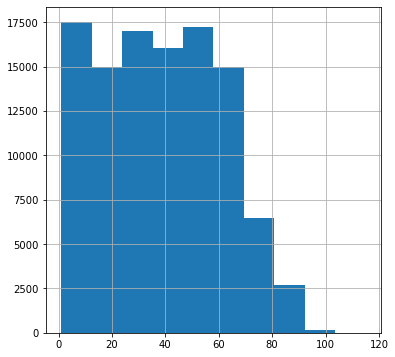

In [249]:
#Plotting ages available in dataset
apps["Age"].hist(figsize = (6,6))

This doctor patients' most age is in younger agesbelow 15 and between 35 and 50

In [250]:
#displayinh mean , max and minimum ages in dataset
apps["Age"].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Age'>

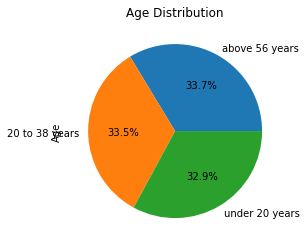

In [251]:
age_dist = apps["Age"].value_counts()

def age_group(age_dist):
    '''This function divides ages into 3 groups , mean age and above and below it'''
    if age_dist <=19:
        return "under 20 years"
    elif age_dist <=38:
        return "20 to 38 years"
    elif age_dist >=56:
        return "above 56 years"

#Applying function to coulumn "Age"    
apps["Age"].astype("int").apply(age_group).value_counts().plot.pie(title = "Age Distribution",autopct='%1.1f%%')    

Patients Age distributon shows they are almost near to each other, only the under 20 is slightly higher than the other ages. 
All in All, no age dominance in this dataset

# Studying Neighbourhood and checking for insights

<AxesSubplot:>

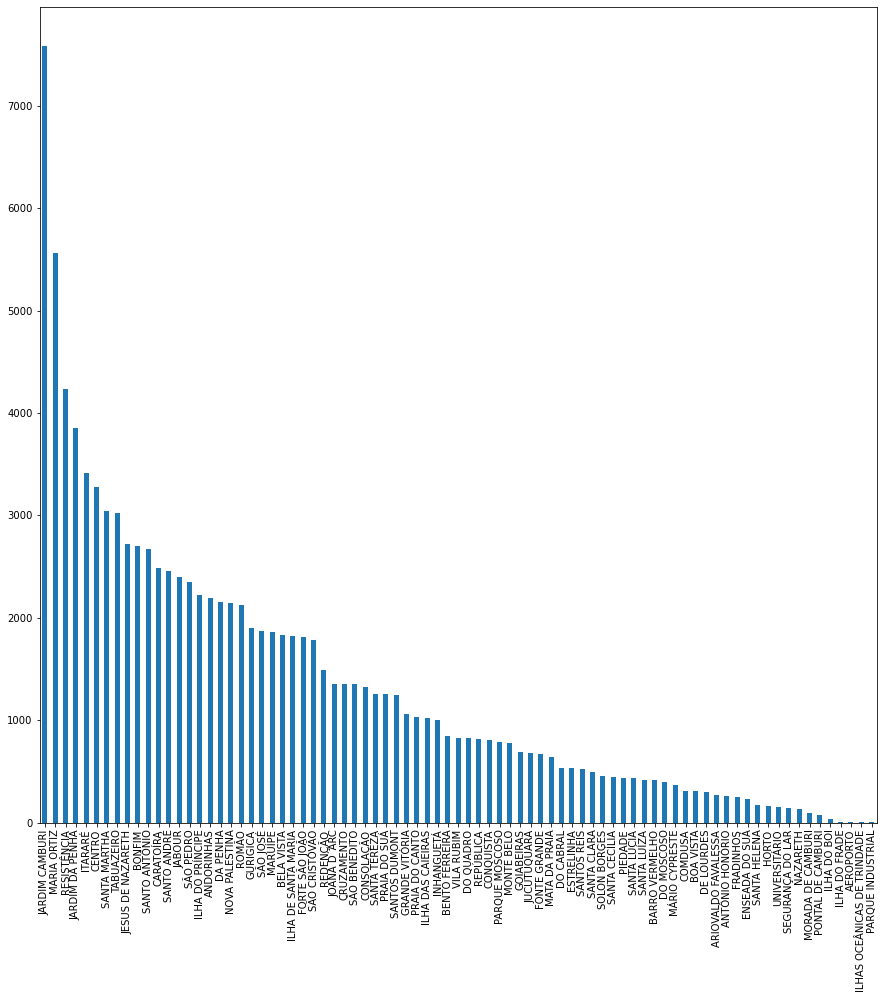

In [252]:
#getting number of patients per district
apps["Neighbourhood"].value_counts().plot(kind="bar",figsize=(15,15))

There are locations which most patients come from , maybe they are near locations to the doctor place

In [253]:
#unique locations available 
unique_locations = apps["Neighbourhood"].value_counts().nunique()
print("Number of unique locations: ",unique_locations)

#The largest 15 locations percentage is 48%
most_pop_location = apps["Neighbourhood"].value_counts().nlargest(15).sum()*100/110526
print("Percentage of the largest 15 locations patients:  %",most_pop_location)


Number of unique locations:  80
Percentage of the largest 15 locations patients:  % 46.83965763711706


In [254]:
apps["PatientId"].value_counts()

822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
75797461494159.0     62
                     ..
548459651631.0        1
88895113683899.0      1
3586378853232.0       1
4672744964989.0       1
5296399515919.0       1
Name: PatientId, Length: 60270, dtype: int64

In [255]:
def recurrent_patient(patient_visits):
    '''Function to classify the number of visits, 
        to draw number of patients with respect to 
        each visit category
    '''
    if patient_visits <= 5:
        return "< 5 visits"
    elif patient_visits <= 10:
        return "< 10 visits"
    elif patient_visits <= 20:
        return "< 20 visits"
    elif patient_visits <= 30:
        return "< 30 visits"
    elif patient_visits <= 40:
        return "< 40 visits"
    elif patient_visits <= 50:
        return "< 50 visits"
    elif patient_visits <= 60:
        return "< 60 visits"
    elif patient_visits <= 70:
        return "< 70 visits"
    elif patient_visits <= 80:
        return "< 80 visits"
    elif patient_visits <= 90:
        return "< 90 visits"
    
    

<AxesSubplot:>

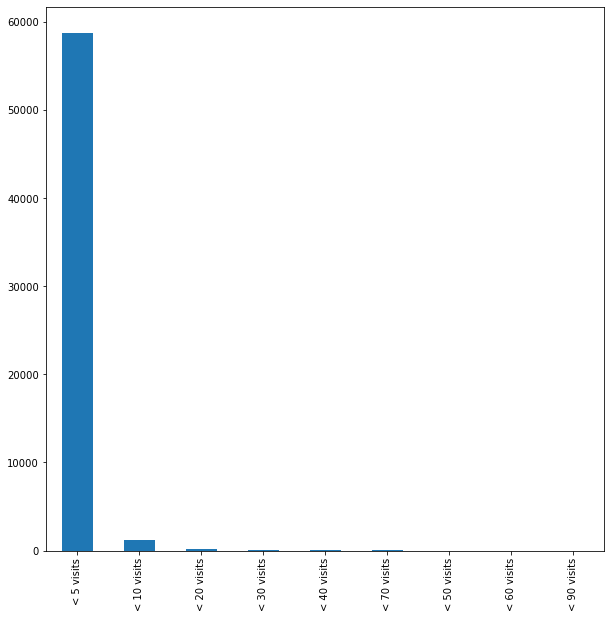

In [256]:
apps["PatientId"].value_counts().apply(recurrent_patient).value_counts().plot(kind="bar",figsize=(10,10))

Most Patients have less than 5 visits

# Studying Gender patterns

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='Gender'>

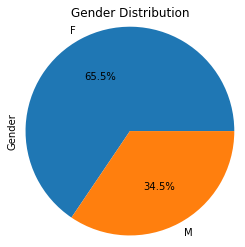

In [257]:
#calculating the distribution of gender
apps["Gender"].value_counts().plot.pie(title = "Gender Distribution",autopct='%1.1f%%',radius=1.2)

It is found that female share the most availability of patients.

# Studying No show patterns

<AxesSubplot:title={'center':'No Show vs Show Up'}>

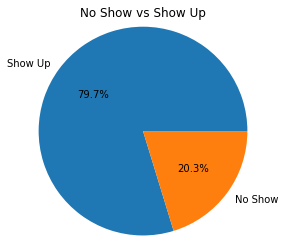

In [258]:
#Showing the no show vs show up
apps["No-show"].value_counts().plot.pie(title = "No Show vs Show Up",autopct='%1.1f%%',radius=1.2,labels=["Show Up","No Show"],ylabel="")

Most Patients show up in their scheduled appointments : 79.8%
The No show is far less than this value , 20.2% , but still a percentage to be studied to find reasons , less that quarter of the 
patients , do not show up

# Studying SMS patterns

<AxesSubplot:title={'center':'SMS Received'}>

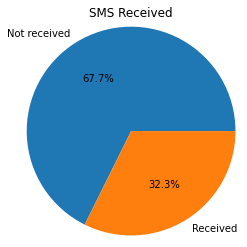

In [259]:
#showing percentage of patients receiving sms and not receiving
apps["SMS_received"].value_counts().plot.pie(title = "SMS Received",autopct='%1.1f%%',radius=1.2,ylabel="",labels=["Not received","Received"])

Most of patients does not receive sms as a remainder of appointment: 68%

# Studying Scholarship patterns

<AxesSubplot:title={'center':'Scholarship'}>

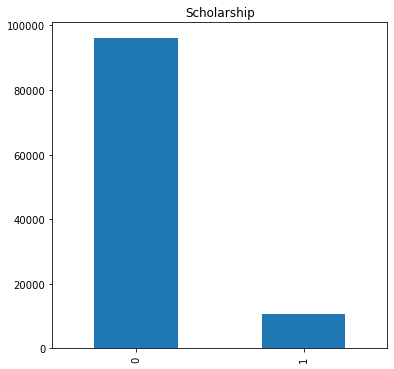

In [260]:
#showing how many patients have scholarship vs who does not
apps["Scholarship"].value_counts().plot(kind='bar',title="Scholarship",figsize=(6,6))

Most of Patents have no scholarship, which might exclude this parameter from affecting the no show

In [261]:
# Studying Patients cases of diabetes, alcoholism, handcap, and hipertension patterns

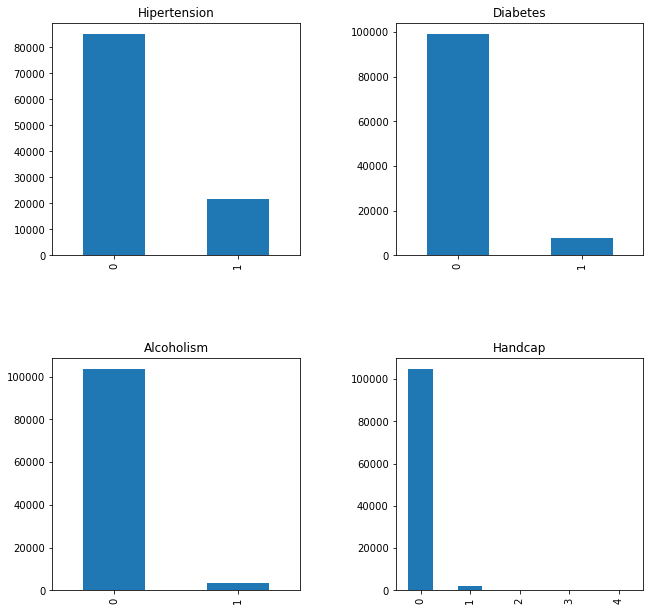

In [262]:
def draw_bar_graph(titles,rows,cols):
    '''Function that takes title, number of rows and columns 
        to draw a bar graph
    '''
    fig, axes = plt.subplots(nrows=rows, ncols=cols)
    fig.tight_layout(pad=2.0)
    ii=0
    jj=0
    for i in titles:
        apps[i].value_counts().plot(ax =axes[ii,jj],kind="bar",figsize=(10,10),title=i)
        jj+=1
        if jj > 1:
            ii+=1
            jj=0
            

titles_b= ["Hipertension","Diabetes","Alcoholism","Handcap"]
draw_bar_graph(titles_b,2,2)

All the cases of hipertension, handcap, alocoholism, and diabetes , show no dominance in the patients number.
This might remove this parameter from affecting the no show factor

# Studying the patterns of most scheduled months, days , hours

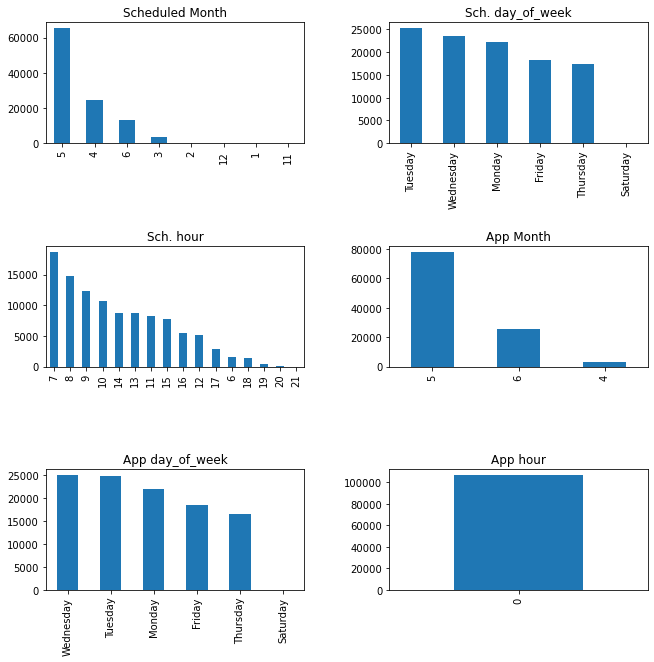

In [263]:
#Checking the months with highest patients appointments
titles_b=["Scheduled Month","Sch. day_of_week","Sch. hour","App Month","App day_of_week","App hour"]
draw_bar_graph(titles_b,3,2)


# Studying Relationships and concluding insights
Gender Commitments

<AxesSubplot:xlabel='Gender'>

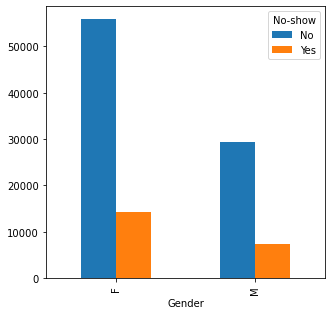

In [264]:
#shows relation between no show and show up with gender 
Gender_show_combined = apps.groupby(["Gender","No-show"]).count()["PatientId"]
Gender_show_combined.unstack().plot(kind="bar",stacked=False,figsize=(5,5))

We cannot decide which gender has more commitment, we need to get percentage to understand

Text(0.5, 1.0, 'Male who showed commitment')

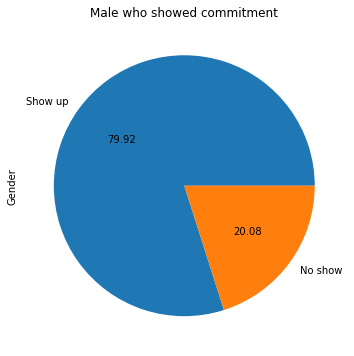

In [265]:
#Getting the percentage to understand the relation more
apps[apps["Gender"]=="M"].groupby("No-show")["Gender"].count().plot(figsize=(6,6),kind="pie",autopct='%.2f',labels=["Show up","No show"])
plt.title("Male who showed commitment")


Male showed commitment , 80% of male patients show up

Text(0.5, 1.0, 'Female who showed commitment')

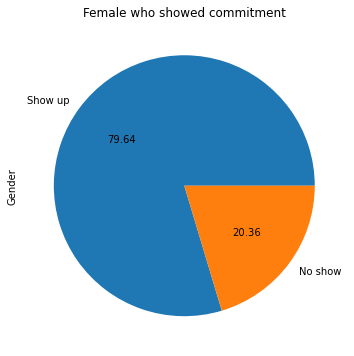

In [266]:
#showing female show up percentage
apps[apps["Gender"] == "F"].groupby("No-show")["Gender"].count().plot(figsize=(6,6),kind="pie",autopct='%.2f',labels=["Show up","No show"])

plt.title("Female who showed commitment")

Female commitment : Female show up with percentage of 80% .

Both Gender having the same commitment level

# Studying Age relation to commitment

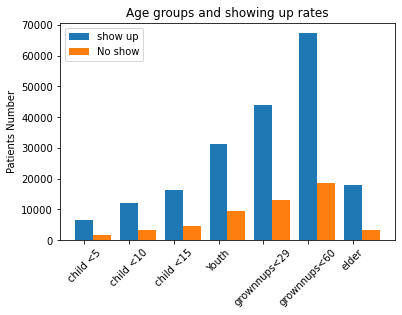

Percentage = % No     6.013065
Yes    1.398766
Name: No-show, dtype: float64
Percentage = % No     10.912365
Yes     2.849103
Name: No-show, dtype: float64
Percentage = % No     14.765756
Yes     4.170060
Name: No-show, dtype: float64
Percentage = % No     28.128223
Yes     8.578977
Name: No-show, dtype: float64
Percentage = % No     39.864828
Yes    11.837034
Name: No-show, dtype: float64
Percentage = % No     60.959412
Yes    16.682048
Name: No-show, dtype: float64
Percentage = % No     16.223332
Yes     2.933246
Name: No-show, dtype: float64


In [267]:
#checking age relation to commitment
#classifying ages in to 7 stages
children_s1 = apps[apps["Age"] <= 5]["No-show"].value_counts()
children_s2 = apps[apps["Age"] <= 10]["No-show"].value_counts()
children_s3 = apps[apps["Age"] <= 15]["No-show"].value_counts()
youth = apps[apps["Age"] <= 29]["No-show"].value_counts()
grownups_s1 = apps[apps["Age"] <= 40]["No-show"].value_counts()
grownups_s2 = apps[apps["Age"] <= 59]["No-show"].value_counts()
elder = apps[apps["Age"] >= 60]["No-show"].value_counts()

age_categories_show = [children_s1,children_s2,children_s3,youth,grownups_s1,grownups_s2,elder]
age_ranges=[5,10,15,29,40,59,60]


fig, ax = plt.subplots()


data = [[children_s1[0], children_s2[0], children_s3[0], youth[0],grownups_s1[0],grownups_s2[0],elder[0]]
        ,[children_s1[1],children_s2[1], children_s3[1], youth[1],grownups_s1[1],grownups_s2[1],elder[1]]]

labels=["child <5","child <10","child <15","Youth","grownnups<29","grownnups<60","elder"]

x = np.arange(len(labels))  


gp = 0.8 / len(data)
for i, row in enumerate(data):
  X = np.arange(len(row))
  ax.bar(X + i * gp, row,
    width = gp)

ax.set_ylabel('Patients Number')
ax.set_title('Age groups and showing up rates')
ax.tick_params(axis='x', rotation=45)

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(["show up","No show"])
plt.show()


def print_percentage(data):
    '''Printing percentages of each age stage'''
    for x in data:
        print("Percentage = %", x*100/110526)
    
    

print_percentage(age_categories_show)







# Neighbourhood and No show

In [268]:
#Neighbourhood and no show counts
neighbourhood_noshow=apps.groupby(["Neighbourhood","No-show"])["No-show"].count()

neighbourhood_noshow

Neighbourhood    No-show
AEROPORTO        No            7
                 Yes           1
ANDORINHAS       No         1686
                 Yes         509
ANTÔNIO HONÓRIO  No          212
                            ... 
TABUAZEIRO       Yes         552
UNIVERSITÁRIO    No          119
                 Yes          32
VILA RUBIM       No          690
                 Yes         139
Name: No-show, Length: 162, dtype: int64

# check relation between patients show up and reminded with sms

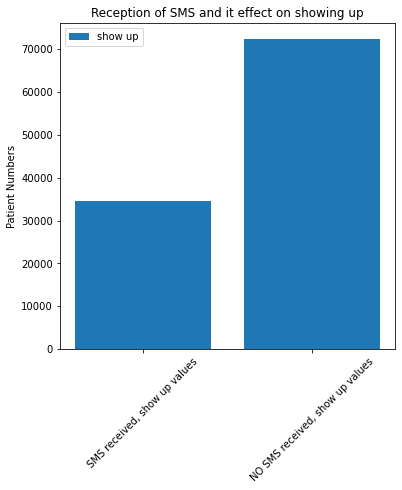

Percentage of patients who has SMS_received is 31.29%.


In [269]:
def relation_one_graph_draw(labels,relation,ylabel,title):
    '''Function that takes relations and labels to draw this relation'''
    fig, ax = plt.subplots(figsize=(6,6))
    data_x=[0,0]
    data_h=[0,0,0,0,0]
    
    #handcap only is put in if condition because it has 5 values , not like the others only 2
    if(relation == "Handcap"):
            data_h[0]=apps[apps[relation]== 0]["No-show"].value_counts().sum()
            data_h[1]=apps[apps[relation]== 1]["No-show"].value_counts().sum()
            data_h[2]=apps[apps[relation]== 2]["No-show"].value_counts().sum()
            data_h[3]=apps[apps[relation]== 3]["No-show"].value_counts().sum()
            data_h[4]=apps[apps[relation]== 4]["No-show"].value_counts().sum()
            x = np.arange(len(labels))  
            ax.bar(range(len(labels)),data_h)

    else:
        data_x[0]=apps[apps[relation]== 1]["No-show"].value_counts().sum()
        data_x[1]=apps[apps[relation]==0]["No-show"].value_counts().sum()
        x = np.arange(len(labels))  
        ax.bar(range(len(labels)),data_x)
        



    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.legend(["show up","No show"])
    plt.show()
    
    hp_count = apps[apps[relation]==1]["PatientId"].count()
    hp_percent = round(hp_count*100/110526,2)
    print("Percentage of patients who has {} is {}%.".format(relation,hp_percent))


labels=["SMS received, show up values","NO SMS received, show up values"]
relation_one_graph_draw(labels,"SMS_received","Patient Numbers","Reception of SMS and it effect on showing up")


It is apparent that receiving sms , has no effect on showing up , as most of patients does not receive sms

# Is patients of certain diseases are more likely to have committed

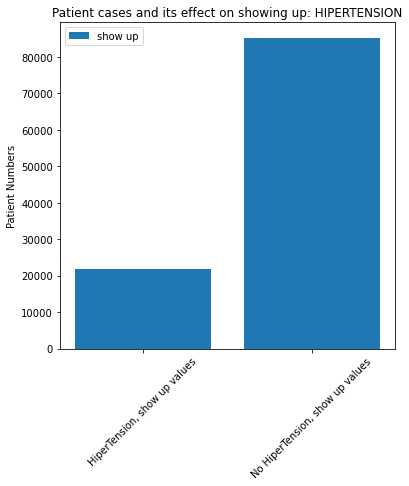

Percentage of patients who has Hipertension is 19.72%.


In [270]:
# HIPERTENSION
labels=["HiperTension, show up values","No HiperTension, show up values"]
relation_one_graph_draw(labels,"Hipertension","Patient Numbers","Patient cases and its effect on showing up: HIPERTENSION")

Only 19.72% has hipertension , so having this cases does not have direct effect of no show 

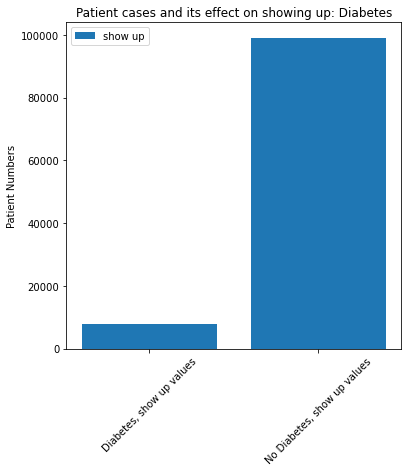

Percentage of patients who has Diabetes is 7.19%.


In [271]:
#   DIABETES
labels=["Diabetes, show up values","No Diabetes, show up values"]
relation_one_graph_draw(labels,"Diabetes","Patient Numbers","Patient cases and its effect on showing up: Diabetes")

Only 7% of patients have diabetes

Also this parameter does not show a clear effect of no show 

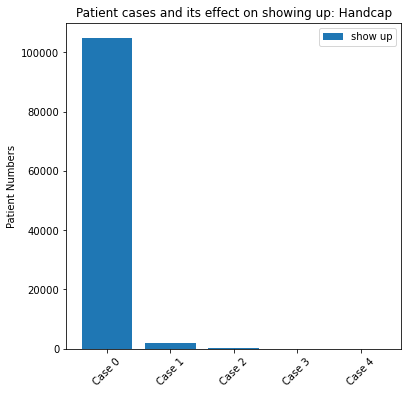

Percentage of patients who has Handcap is 1.85%.


In [272]:
labels=["Case 0","Case 1","Case 2","Case 3","Case 4"]
relation_one_graph_draw(labels,"Handcap","Patient Numbers","Patient cases and its effect on showing up: Handcap")

Considering case 0 : no handcap
Considering case 1,2,3,4 : handcap with different levels

only 1.85% is handcap 

No clear effect of this parameter on no show


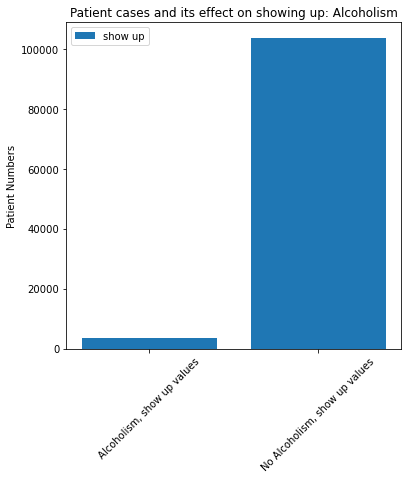

Percentage of patients who has Alcoholism is 3.04%.


In [273]:
# ALCOHOLISM
labels=["Alcoholism, show up values","No Alcoholism, show up values"]
relation_one_graph_draw(labels,"Alcoholism","Patient Numbers","Patient cases and its effect on showing up: Alcoholism")



Percentage of patients who has Alcoholism is 3.04%.
Clearly no great effect of alcoholism on no show

# SCHOLARSHIP AND NO SHOW

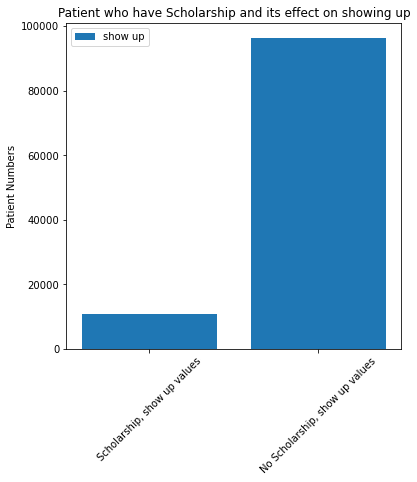

Percentage of patients who has Scholarship is 9.78%.


In [274]:
labels=["Scholarship, show up values","No Scholarship, show up values"]
relation_one_graph_draw(labels,"Scholarship","Patient Numbers","Patient who have Scholarship and its effect on showing up")

Percentage of patients who has Scholarship is 9.83%.
small percentage which will not greatly affecct showing up 

# STUDYING NEIGHBOURHOOD WITH NO SHOW

Text(0.5, 1.0, 'Number of patients per area/neighbourhood ')

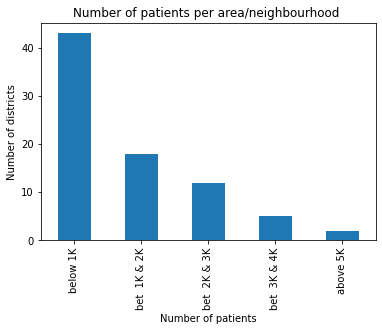

In [275]:
def neighbourhood_categories(residents_patients):
    '''Categorizing neighbourhoods with number of patients coming from'''
    if residents_patients <=1000:
        return "below 1K"
    elif residents_patients <=2000:
        return "bet  1K & 2K"
    elif residents_patients <=3000:
        return "bet  2K & 3K"
    elif residents_patients <=4000:
        return "bet  3K & 4K"
    elif residents_patients >=5000:
        return "above 5K"


apps["Neighbourhood"].value_counts().apply(neighbourhood_categories).value_counts().plot(kind="bar",xlabel="Number of patients",ylabel="Number of districts")
plt.title("Number of patients per area/neighbourhood ")


40 neighbourhoods have less than 1000 patients

18 neighbourhoods have between 1000 patients and 2000 patients

13 neighbourhoods have between 2000 patients and 3000 patients

6 neighbourhoods have between 3000 patients and 4000 patients

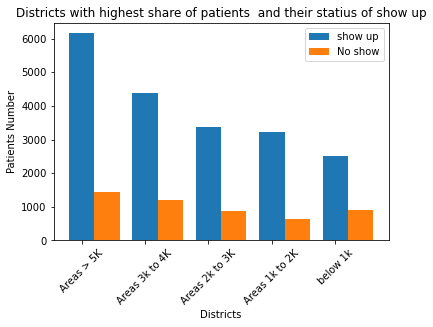

In [276]:
def draw_ml(labels,data,xlabel,title):
    '''Draw one relation between multiple values
        to show each parameter with show up or no show
    '''
    fig, ax = plt.subplots()
    x = np.arange(len(labels))  
    gp = 0.8 / len(data)
    for i, row in enumerate(data):
        X = np.arange(len(row))
        ax.bar(X + i * gp, row,
        width = gp)

    ax.set_ylabel('Patients Number')
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.legend(["show up","No show"])
    plt.show()

    

neigh_count = apps["Neighbourhood"].value_counts()
largest_neighbor = neigh_count.nlargest(5)

f_largest=  apps[apps["Neighbourhood"] == largest_neighbor.index[0]]["No-show"].value_counts()
s_largest=  apps[apps["Neighbourhood"] == largest_neighbor.index[1]]["No-show"].value_counts()
t_largest=  apps[apps["Neighbourhood"] == largest_neighbor.index[2]]["No-show"].value_counts()
fo_largest=  apps[apps["Neighbourhood"] == largest_neighbor.index[3]]["No-show"].value_counts()
ff_largest=  apps[apps["Neighbourhood"] == largest_neighbor.index[4]]["No-show"].value_counts()
    
district_categories_show = [f_largest,s_largest,t_largest,fo_largest,ff_largest]

##############################################################################################
data = [[f_largest[0], s_largest[0], t_largest[0], fo_largest[0],ff_largest[0]]
        ,[f_largest[1],s_largest[1], t_largest[1], fo_largest[1],ff_largest[1]]]
labels=["Areas > 5K","Areas 3k to 4K","Areas 2k to 3K","Areas 1k to 2K","below 1k"]
draw_ml(labels,data,'Districts','Districts with highest share of patients  and their statius of show up')

# STUDYING ALL SCHEDULED TIMES , AND IF THERE IS COMMITMENT ISSUES CONNECTED TO CERTAIN TIME OR DURATIONS

In [277]:
mm = apps["Scheduled Month"].value_counts().nlargest(4)
dd = apps["Sch. day_of_week"].value_counts().nlargest(4)
hh = apps["Sch. hour"].value_counts().nlargest(6)

print(mm,dd,hh)

5    65362
4    24395
6    13352
3     3488
Name: Scheduled Month, dtype: int64 Tuesday      25280
Wednesday    23544
Monday       22247
Friday       18374
Name: Sch. day_of_week, dtype: int64 7     18768
8     14806
9     12382
10    10623
14     8759
13     8684
Name: Sch. hour, dtype: int64


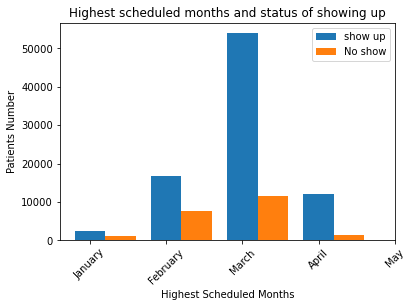

[Series([], dtype: string),
 No     2332
 Yes    1156
 Name: No-show, dtype: int64,
 No     16810
 Yes     7585
 Name: No-show, dtype: int64,
 No     53905
 Yes    11457
 Name: No-show, dtype: int64,
 No     11986
 Yes     1366
 Name: No-show, dtype: int64]

In [278]:
data_list1=[]
data_list2=[]
data_combined=[data_list1,data_list2]

months_list = list(range(3, 7))
list_of_series = [ pd.Series([],dtype=pd.StringDtype())]
for month in range(1,5):
    list_of_series.append(pd.Series([],dtype=pd.StringDtype()))

for p,m in zip(months_list,range(1,5)):
    list_of_series[m] = apps[apps["Scheduled Month"] == p]["No-show"].value_counts()
for ser in range(1,5):
    data_list1.append(list_of_series[ser]["No"])
    data_list2.append(list_of_series[ser]["Yes"])
        
labels=["January","February","March","April","May"]
draw_ml(labels,data_combined,'Highest Scheduled Months','Highest scheduled months and status of showing up')
list_of_series

The dataset shows that march has most schedueled appointments  , and then february and april , and no enough information in the other months

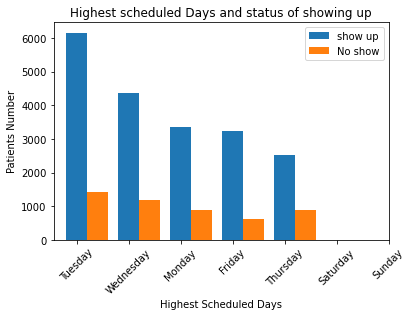

In [279]:
data_list1=[]
data_list2=[]
data_combined=[data_list1,data_list2]

week_list = ["Tuesday","Wednesday","Monday","Friday","Thursday","Saturday","Sunday"]
list_of_series = [ pd.Series([],dtype=pd.StringDtype())]
for week in week_list:
    list_of_series.append(pd.Series([],dtype=pd.StringDtype()))

for p,n in zip(week_list,range(0,len(week_list)+1)):
     list_of_series[n] = apps[apps["Sch. day_of_week"] == p]["No-show"].value_counts()
for ser in range(0,8):
    data_list1.append(list_of_series[ser])
    data_list2.append(list_of_series[ser])



#########################################################################################################    
labels=["Tuesday","Wednesday","Monday","Friday","Thursday","Saturday","Sunday"]
draw_ml(labels,data,'Highest Scheduled Days','Highest scheduled Days and status of showing up')


show up values are greater in all days , whatever the traffic of the day 
no clear info can be get from this relation

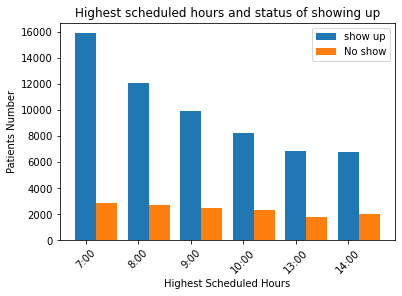

[No     15889
 Yes     2879
 Name: No-show, dtype: int64,
 No     12062
 Yes     2744
 Name: No-show, dtype: int64,
 No     9933
 Yes    2449
 Name: No-show, dtype: int64,
 No     8268
 Yes    2355
 Name: No-show, dtype: int64,
 No     6873
 Yes    1811
 Name: No-show, dtype: int64,
 No     6764
 Yes    1995
 Name: No-show, dtype: int64,
 Series([], dtype: string)]

In [280]:
data_list1=[]
data_list2=[]
data_combined=[data_list1,data_list2]

hours_list = [7,8,9,10,13,14]
list_of_series = [ pd.Series([],dtype=pd.StringDtype())]
for hour in hours_list:
    list_of_series.append(pd.Series([],dtype=pd.StringDtype()))

for p,n in zip(hours_list,range(len(hours_list))):
     list_of_series[n] = apps[apps["Sch. hour"] == p]["No-show"].value_counts()
for ser in range(0,6):
    data_list1.append(list_of_series[ser]['No'])
    data_list2.append(list_of_series[ser]['Yes'])
        
    

#########################################################################################################    
labels=["7:00","8:00","9:00","10:00","13:00","14:00"]
draw_ml(labels,data_combined,'Highest Scheduled Hours','Highest scheduled hours and status of showing up')
list_of_series

show up values are greater in all hours from 7 to 14 , whatever the traffic of the day no clear info can be get from this relation



# Conclusions:

# Limitations